In [226]:
# Constantes 
QUEEN_INDENTIFIER = 22
NUMBER_OF_QUEENS = 4
NUMBER_OF_BOARDS = 10
MOCK_INPUT = [NUMBER_OF_QUEENS, NUMBER_OF_BOARDS]

### Definição de funções utilitárias para o movimento das rainhas

In [227]:
def horizontal_attack(first_position: tuple[int, int], second_position: tuple[int, int]) -> bool:
    """
    Verifies if first_position's queen can attack the second_position's queen by comparing
    it's line coordinate (first tuple coordinate).
    """
    return first_position[0] == second_position[0]

def diagonal_attack(first_position: tuple[int, int], second_position: tuple[int, int]) -> bool:
    """
    Verifies if first_position's queen can attack the second_position's queen by comparing
    it's diagonal coordinates. The absolute value of the coordinates difference must be the
    same.
    """
    return abs(first_position[0] - second_position[0]) == abs(first_position[1] - second_position[1])

### Definição da principal classe do projeto 'Board'

#### Esta classe implementa a criação do tabuleiro jogo, com as damas sendo aleatoriamente posicionadas. 

In [228]:
from copy import copy
from random import choice, randint

import matplotlib.pyplot as plt
import numpy as np

class Board:
    def __init__(self, N, game_board=None) -> None:
        self.first_coordinate = N
        self.second_coordinate = N
        if game_board is None:
            self.game_board = self.builder()
            self.queens_generator()
        else:
            self.game_board = game_board
        self.heuristic_value = None

    def builder(self) -> np.array:
        game_board = np.zeros((self.first_coordinate, self.second_coordinate))
        game_board[1::2, 0::2] = 1
        game_board[0::2, 1::2] = 1
        return game_board

    def queens_generator(self) -> None:
        for j in range(len(self.game_board)):
            queens_row = randint(0, len(self.game_board) - 1)
            queens_column = j
            self.game_board[
                queens_row, queens_column
            ] = QUEEN_INDENTIFIER  # this integer number gives the distinct color

    def queens_attacks(self) -> int:
        queens_positions = np.argwhere(self.game_board == QUEEN_INDENTIFIER).tolist()
        queens_positions = sorted(queens_positions, key=lambda position: position[1])

        number_of_attacks = 0

        for i in range(len(queens_positions) - 1):
            for j in range(i + 1, len(queens_positions)):
                if horizontal_attack(
                    queens_positions[i], queens_positions[j]
                ) or diagonal_attack(queens_positions[i], queens_positions[j]):
                    number_of_attacks += 1

        # print(f"Numero de ataques nesse tabuleiro {number_of_attacks}")
        self.heuristic_value = -1 * number_of_attacks

        return number_of_attacks

    def all_neighbors(self) -> list[Board]:
        queens_positions = np.argwhere(self.game_board == QUEEN_INDENTIFIER).tolist()
        queens_positions = sorted(queens_positions, key=lambda position: position[1])

        neighbors = []

        for position in queens_positions:
            original_row, original_column = position[0], position[1]
            available_rows = [
                i for i in range(self.first_coordinate) if i != original_row
            ]

            for row in available_rows:
                new_game_board = copy(self.game_board)
                new_game_board[original_row, original_column] = 0
                new_game_board[row, original_column] = QUEEN_INDENTIFIER

                neighbors.append(Board(self.first_coordinate, new_game_board))

        return neighbors

    def any_neighbor(self) -> Board:
        queens_positions = np.argwhere(self.game_board == QUEEN_INDENTIFIER).tolist()
        queens_positions = sorted(queens_positions, key=lambda position: position[1])

        # Escolhendo aleatoriamente a rainha que ira mudar de lugar
        any_position = choice(queens_positions)

        original_row, original_column = any_position[0], any_position[1]
        available_rows = [i for i in range(self.first_coordinate) if i != original_row]

        # Escolhendo aleatoriamente para qual linha a rainha ira
        any_row = choice(available_rows)

        # Gerando o vizinho com as informacoes anteriores
        new_game_board = copy(self.game_board)
        new_game_board[original_row, original_column] = 0
        new_game_board[any_row, original_column] = QUEEN_INDENTIFIER

        return Board(self.first_coordinate, new_game_board)

    def __str__(self):
        return f"\nHeuristic: {self.heuristic_value}\n{str(self.game_board)}\n"

    def __repr__(self):
        size = self.first_coordinate
        return f"Board({size},{size})"


### Definição da função que gera todos os vizinhos de um dado tabuleiro

In [229]:
def all_neighbors(board: Board) -> NotImplemented:
    queens_positions = np.argwhere(board.game_board == QUEEN_INDENTIFIER).tolist()
    queens_positions = sorted(queens_positions, key=lambda position: position[1])

    neighbors = []

    for position in queens_positions:
        current_row = position[0]
        available_rows = [i for i in range(board.first_coordinate) if i != current_row]

        for row in available_rows:
            new_board = board.game_board
            new_board[position[0], position[1]] = 0
            new_board[row, position[1]] = QUEEN_INDENTIFIER

            neighbors.append(new_board)

    return neighbors


### Definição da função 'tabuleiro' 

In [230]:
def tabuleiro(N: int, Q: int) -> list[Board]:
    """
    Retorna Q tabuleiros, cada um com N rainhas.
    """
    all_boards = []
    for _ in range(Q):
        board = Board(N)
        all_boards.append(board)
    return all_boards


### Definição da função 'umVizinho' 

In [231]:
def um_vizinho(board: Board) -> Board:
    """
    Retorna um vizinho aleatorio do tabuleiro.
    """
    return board.any_neighbor()


### Definição da função 'todosVizinhos'

In [232]:
def todos_vizinhos(board: Board) -> list[Board]:
    """
    Dado um tabuleiro qualquer, retorna todos os seus vizinhos.
    """
    return board.all_neighbors()


### Definindo função adicional 'vizualiza todos vizinhos'

In [233]:
def vizualiza_todos_vizinhos(neighbors: list[Board]):
    """
    Funcao adicional para auxiliar na visualizacao de todos os vizinhos
    de um determinado tabuleiro. As variaveis estao inicialmente setadas
    para montar a visualizacao de 12 vizinhos.
    """

    fig = plt.figure(figsize=(16, 9))
    columns = 6
    rows = (len(neighbors)//columns) + 1
    for i in range(1, len(neighbors) + 1):
        board = neighbors[i - 1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(board.game_board)
        plt.axis("off")
        plt.title(f"Ataques: {board.queens_attacks()}")


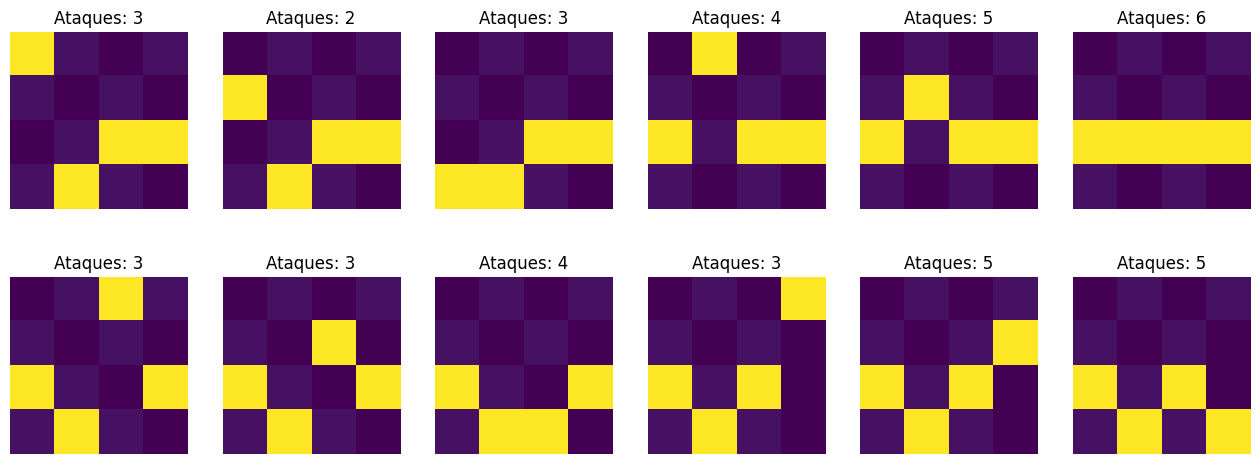

In [234]:
def main():
    number_of_queens, number_of_boards = MOCK_INPUT
    generated_boards = tabuleiro(number_of_queens, number_of_boards)

    board = choice(generated_boards)
    neighbors = todos_vizinhos(board)
    vizualiza_todos_vizinhos(neighbors)

    # board.queens_generator()
    # board.queens_attacks()
    # neighbors = board.all_neighbors()


if __name__ == "__main__":
    main()


In [235]:
# Testando a busca do melhor valor heuristico
number_of_queens, number_of_boards = MOCK_INPUT
generated_boards = tabuleiro(number_of_queens, number_of_boards)

board = choice(generated_boards)

neighbors = todos_vizinhos(board)

# More Pythonic way to write this?
for board in neighbors:
    board.queens_attacks()

best_board = max(neighbors, key=lambda board: board.heuristic_value)
best_heuristic_value = best_board.heuristic_value

get_best_heuristic = lambda board: board.heuristic_value == best_heuristic_value
best_neighbors = list(filter(get_best_heuristic, neighbors))
the_best_neighbor = choice(best_neighbors)


In [236]:
# Hill Climb's best choice

number_of_queens, number_of_boards = MOCK_INPUT
generated_boards = tabuleiro(number_of_queens, number_of_boards)

board = choice(generated_boards)
board.queens_attacks()

SAME_BOARD = copy(board)


def hill_climbing_best_choice(board: Board) -> Board:

    best_heuristic_board = board
    print(f"Initial best heuristic value: {best_heuristic_board.heuristic_value}")

    while True:
        neighbors = todos_vizinhos(board)

        # Calculating the number of attacks in each board to generate each heuristic value
        for board in neighbors:
            board.queens_attacks()

        best_board = max(neighbors, key=lambda board: board.heuristic_value)
        new_heuristic_value = best_board.heuristic_value

        if new_heuristic_value <= best_heuristic_board.heuristic_value:
            break

        best_heuristic_board = best_board

        get_best_heuristic = (
            lambda board: board.heuristic_value == best_heuristic_board.heuristic_value
        )
        best_neighbors = list(filter(get_best_heuristic, neighbors))
        the_best_neighbor = choice(best_neighbors)

        board = the_best_neighbor

    print(f"Final best board: {board}")


hill_climbing_best_choice(board)


Initial best heuristic value: -1
Final best board: 
Heuristic: -1
[[ 0.  1. 22.  1.]
 [22.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1. 22.  1. 22.]]



In [237]:
# Hill Climb's first choice

# Nessa versao o melhor vizinho sera eventualmente encontrado,
# porem sem o beneficio da analise previa de todos os vizinhos


def hill_climbing_first_choice(board: Board) -> Board:

    best_heuristic_board = board
    print(f"Initial best heuristic value: {best_heuristic_board.heuristic_value}")

    searchs = 0
    search_range = 5 * board.first_coordinate

    while searchs != search_range:
        neighbor = um_vizinho(board)

        # Calculating the number of attacks in the neighbor board to generate the heuristic value
        neighbor.queens_attacks()

        new_heuristic_value = neighbor.heuristic_value

        if new_heuristic_value <= best_heuristic_board.heuristic_value:
            searchs += 1
            continue

        best_heuristic_board = neighbor
        board = neighbor

        searchs = 0

    print(f"Final best heuristic board: {best_heuristic_board}")


hill_climbing_first_choice(SAME_BOARD)


Initial best heuristic value: -1
Final best heuristic board: 
Heuristic: -1
[[22.  1. 22.  1.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  0. 22.]
 [ 1. 22.  1.  0.]]



### OBS: GERAR UMA FUNCAO NUMEROATAQUES QUE CHAMA QUEENS_ATACKS